## Import Library

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [34]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [35]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [36]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [37]:
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Area Category': ['Standard' 'Below Standard' 'Sangat Premium' 'Premium']
Unique values in 'Nama Daerah': ['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan' 'Kalilom'
 'Bulak Cumpat barat' 'Tambak Wedi' 'Lebak Jaya'
 'Simo Gunung Kramat Timur' 'Medokan Ayu' 'Lebak Rejo' 'Medokan Sawah'
 'Klampis Ngasem' 'Medokan Sawah Timur' 'Citraland Golf Avenue'
 'Wisata Semanggi' 'Kedung Klinter' 'Gading Indah Regency'
 'Gunung Anyar Mas' 'Kutisari Utara' 'Mulyosari Tengah' 'Kapas Madya'
 'Bratang Gede' 'Citraland Utara' 'Lebak Jaya Utara' 'Mulyosari Timur'
 'Pakuwon City' 'Pakuwon city' 'Pakuwon City Florence' 'Pantai Mentari'
 'Royal Residence' 'Villa Kalijudan Indah' 'Sutorejo Timur'
 'Springville Residence' 'Sukomanunggal' 'Surabaya Pusat' 'Su' 'Mulyosari'
 'Krukah Selatan' 'Mulyosari Utara' 'Pondok Benowo Indah' 'Kenjeran Indah'
 'Tenggilis' 'Wisma Mukti' 'wonokromo' 'Sakura Regency Ketintan

## DATA INTEPRETATION

Based on the output of df.info(), the dataset contains 308 entries and 12 columns. It includes information about properties such as Area Category, Nama Daerah, Luas Tanah (m2), Luas Bangunan (m2), Jumlah Kamar, Jumlah Kamar Mandi, Tingkat/Lantai, Harga Penawaran (dari Owner), Terjual/Belum, Arah Hadap Rumah, Posisi Rumah, and Lebar Jalan Depan Rumah (ROW).

Regarding missing values, the df.info() output shows that all columns have 308 non-null entries, which is the same as the total number of entries in the dataset. This indicates that there are no missing values in this dataset.

# DATA VISUALITATION

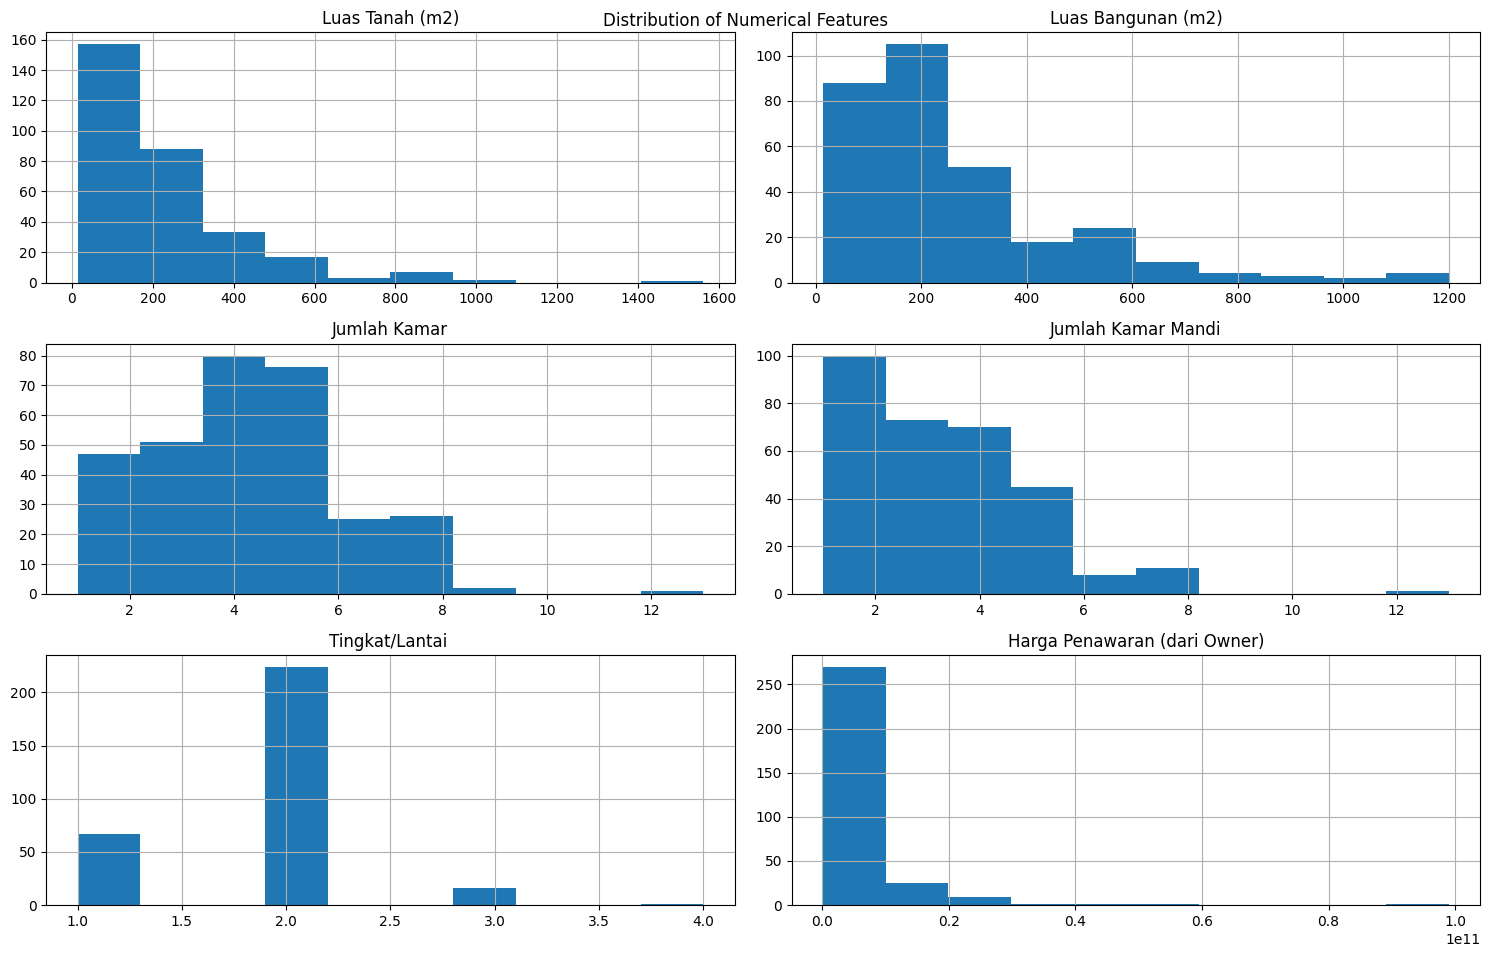

In [38]:
# Visualize the distribution of numerical features
numerical_cols = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)']
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", y=0.95)
plt.tight_layout()
plt.show()

**Interpretation of Numerical Feature Distributions:**

*   **Luas Tanah (m2) and Luas Bangunan (m2):** Both show a right-skewed distribution, indicating that most properties have smaller land and building areas, with a few properties having significantly larger areas.
*   **Jumlah Kamar and Jumlah Kamar Mandi:** These also appear to be right-skewed, suggesting that most properties have a smaller number of bedrooms and bathrooms.
*   **Tingkat/Lantai:** The distribution is heavily skewed towards 2 levels, indicating that most properties are two-story houses.
*   **Harga Penawaran (dari Owner):** This feature is highly right-skewed, which is expected as property prices often follow such a distribution, with a few very expensive properties.

/tmp/ipython-input-1877786183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


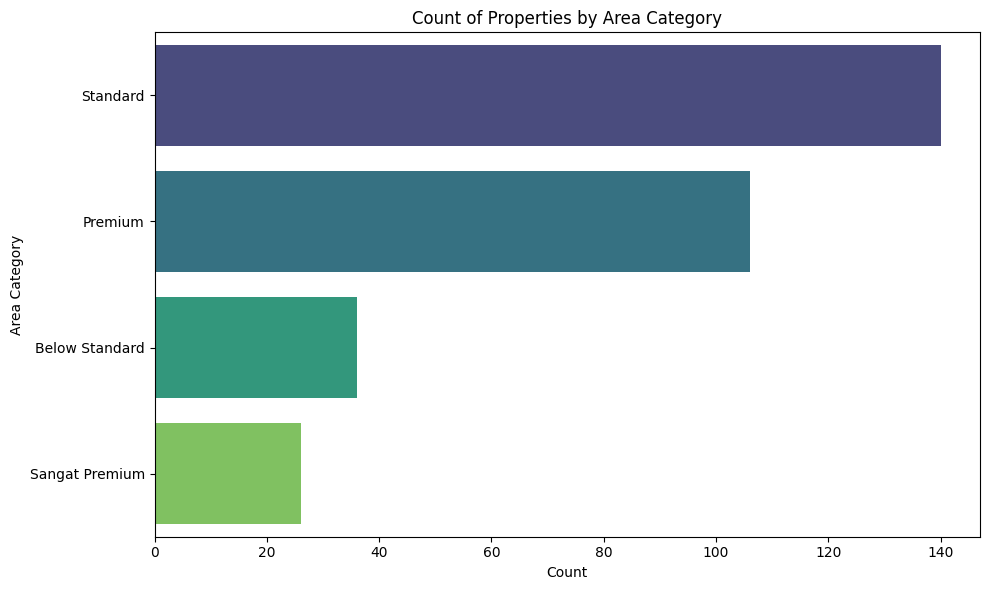

/tmp/ipython-input-1877786183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


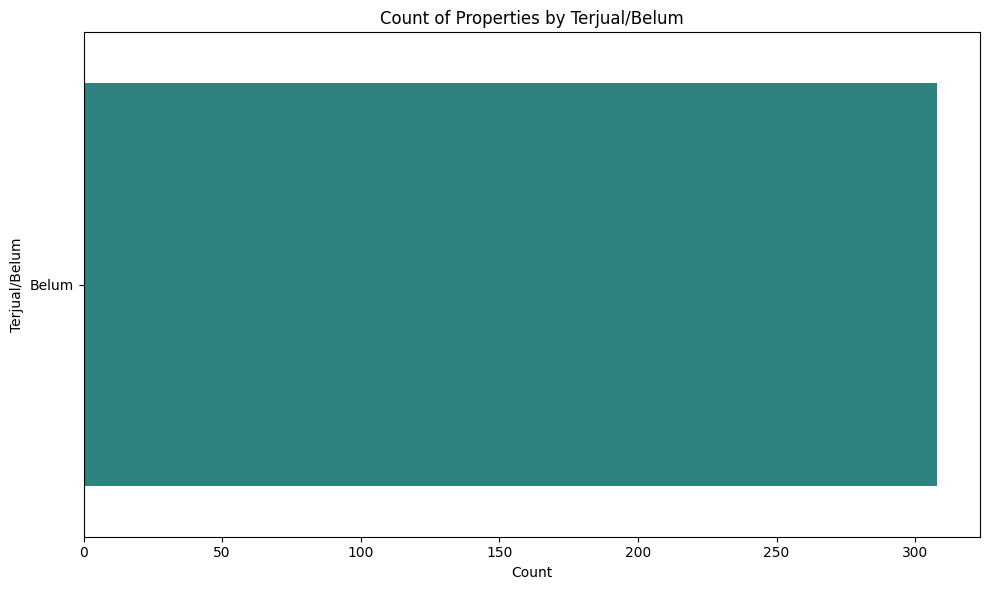

/tmp/ipython-input-1877786183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


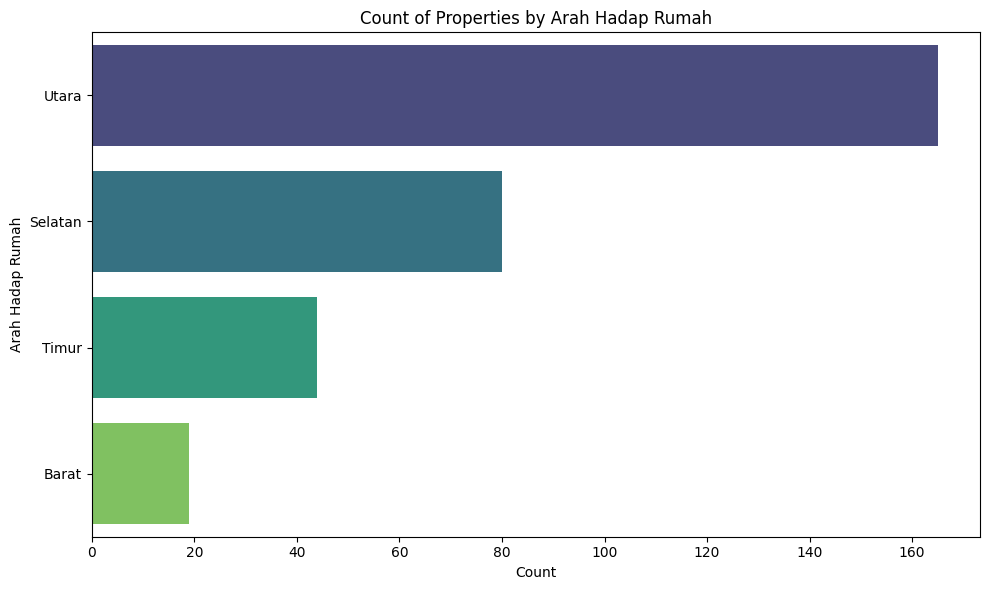

/tmp/ipython-input-1877786183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


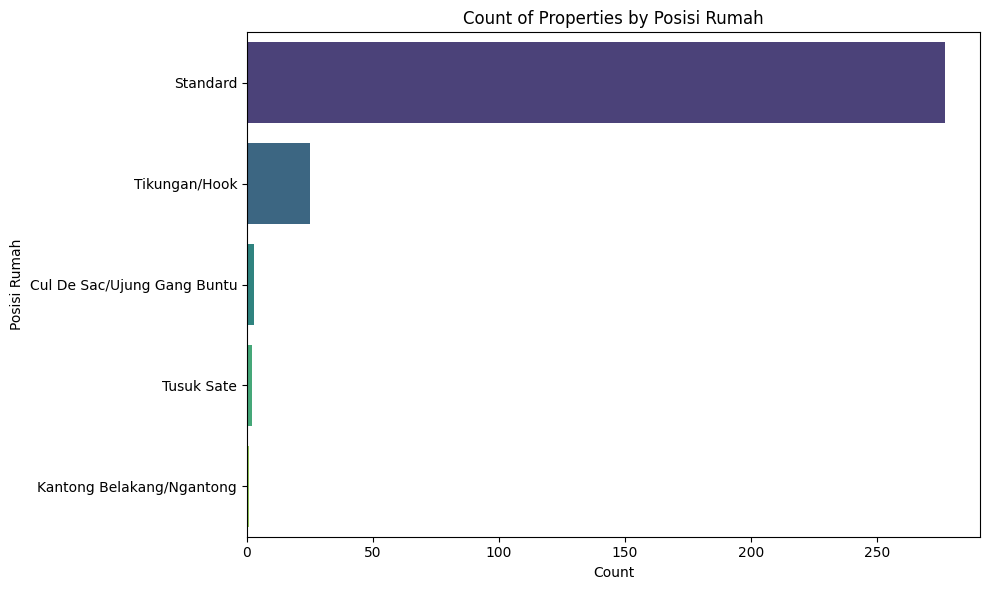

/tmp/ipython-input-1877786183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


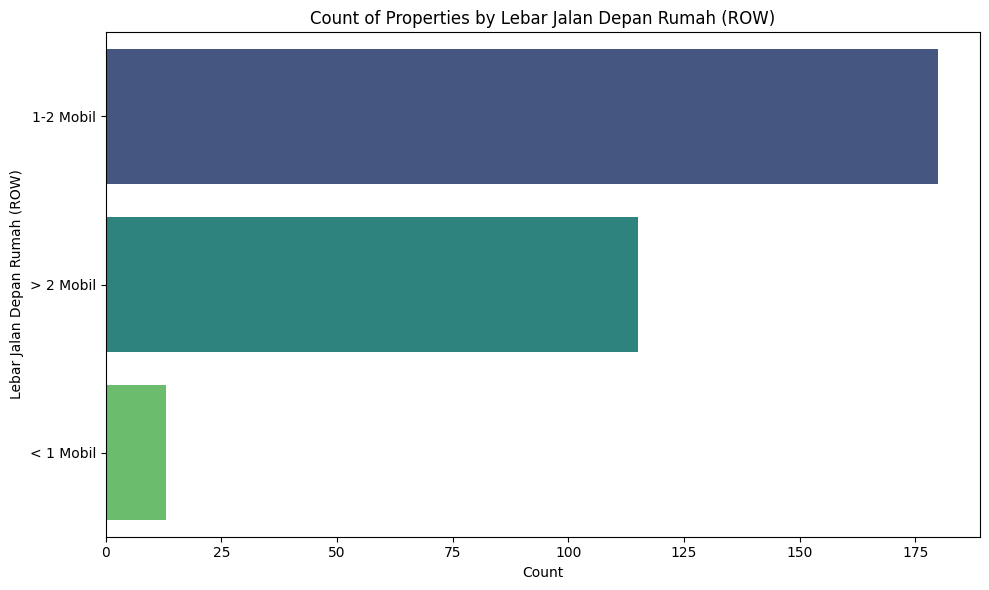

In [39]:
# Visualize the counts of categorical features
categorical_cols = ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Count of Properties by {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**Interpretation of Categorical Feature Counts:**

*   **Area Category:** The majority of properties fall under the 'Standard' category, followed by 'Premium', 'Sangat Premium', and 'Below Standard'.
*   **Terjual/Belum:** All properties in this dataset are marked as 'Belum' (Not Sold). This means this column won't be useful for clustering based on sales status as there is no variation.
*   **Arah Hadap Rumah:** Properties facing 'Utara' (North) and 'Selatan' (South) are the most common.
*   **Posisi Rumah:** Most properties are in a 'Standard' position, with 'Cul De Sac/Ujung Gang Buntu' and 'Tikungan/Hook' being less frequent. The other categories ('Kantong Belakang/Ngantong' and 'Tusuk Sate') are quite rare in this dataset.
*   **Lebar Jalan Depan Rumah (ROW):** The most common road width is '1-2 Mobil' (1-2 Cars), followed by '> 2 Mobil' (more than 2 Cars) and '< 1 Mobil' (less than 1 Car).

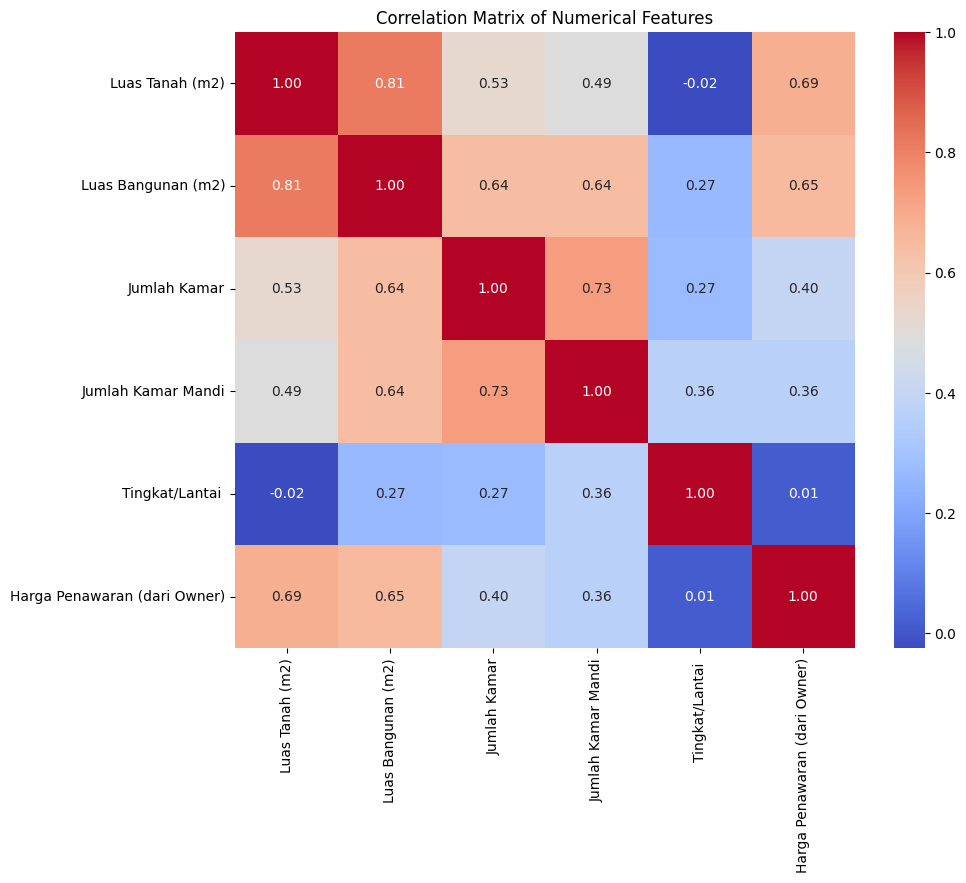

In [40]:
# Visualize the correlation matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Interpretation of the Correlation Matrix:**

The correlation matrix shows the pairwise linear correlation coefficients between the numerical features.

*   **Strong Positive Correlations:**
    *   `Luas Tanah (m2)` and `Luas Bangunan (m2)`: There is a strong positive correlation (around 0.80) between the land area and building area, which is expected as larger plots of land often have larger houses built on them.
    *   `Jumlah Kamar` and `Jumlah Kamar Mandi`: There is also a strong positive correlation (around 0.70) between the number of bedrooms and bathrooms, indicating that houses with more bedrooms tend to have more bathrooms.
    *   `Luas Bangunan (m2)` and `Jumlah Kamar`: A moderately strong positive correlation (around 0.60) exists between building area and the number of bedrooms.
    *   `Luas Tanah (m2)` and `Jumlah Kamar`: There is a moderate positive correlation (around 0.50) between land area and the number of bedrooms.

*   **Moderate Positive Correlations:**
    *   `Harga Penawaran (dari Owner)` shows moderate positive correlations with `Luas Tanah (m2)`, `Luas Bangunan (m2)`, `Jumlah Kamar`, and `Jumlah Kamar Mandi`. This suggests that larger properties with more rooms tend to have higher asking prices.

*   **Weak or No Significant Correlations:**
    *   `Tingkat/Lantai ` shows weak or no significant correlations with most other numerical features, suggesting that the number of floors is not strongly linearly related to the size, number of rooms, or price of the property.

Overall, the heatmap confirms expected relationships between property features like size, number of rooms, and price. These correlations can be useful in understanding which features might be more influential in forming clusters.

# PART C

## Data Transformation

In [42]:
# Identify categorical columns for encoding (excluding 'Terjual/Belum' as it has only one unique value)
categorical_cols_for_encoding = ['Area Category', 'Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# Apply one-hot encoding to the selected categorical columns
df_encoded_categorical = pd.get_dummies(df[categorical_cols_for_encoding], drop_first=True)

# Concatenate the one-hot encoded columns with the original dataframe (excluding the original categorical columns)
df_processed = pd.concat([df.drop(columns=categorical_cols_for_encoding + ['Terjual/Belum']), df_encoded_categorical], axis=1)

# Display the first few rows of the processed DataFrame
display(df_processed.head())

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Area Category_Premium,Area Category_Sangat Premium,Area Category_Standard,Nama Daerah_Araya,...,Nama Daerah_wonokromo,Arah Hadap Rumah_Selatan,Arah Hadap Rumah_Timur,Arah Hadap Rumah_Utara,Posisi Rumah_Kantong Belakang/Ngantong,Posisi Rumah_Standard,Posisi Rumah_Tikungan/Hook,Posisi Rumah_Tusuk Sate,Lebar Jalan Depan Rumah (ROW)_< 1 Mobil,Lebar Jalan Depan Rumah (ROW)_> 2 Mobil
0,240,300,4,3,2,3500000000,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1,30,60,2,1,2,287799000,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
2,170,170,5,4,2,2699999999,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,187,250,5,5,2,3100000000,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
4,350,600,5,5,2,5000000000,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [43]:
# Identify numerical columns in the processed dataframe
numerical_cols_processed = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)']

# Create a StandardScaler object
sc = StandardScaler()

# Fit and transform the selected numerical columns
df_scaled_numerical = sc.fit_transform(df_processed[numerical_cols_processed])

# Replace the original numerical columns with the scaled ones in df_processed
df_processed[numerical_cols_processed] = df_scaled_numerical

# Display the first few rows of the scaled DataFrame
display(df_processed.head())

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Area Category_Premium,Area Category_Sangat Premium,Area Category_Standard,Nama Daerah_Araya,...,Nama Daerah_wonokromo,Arah Hadap Rumah_Selatan,Arah Hadap Rumah_Timur,Arah Hadap Rumah_Utara,Posisi Rumah_Kantong Belakang/Ngantong,Posisi Rumah_Standard,Posisi Rumah_Tikungan/Hook,Posisi Rumah_Tusuk Sate,Lebar Jalan Depan Rumah (ROW)_< 1 Mobil,Lebar Jalan Depan Rumah (ROW)_> 2 Mobil
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Silhouette Score

Skipping Ward linkage with Manhattan metric (not supported).


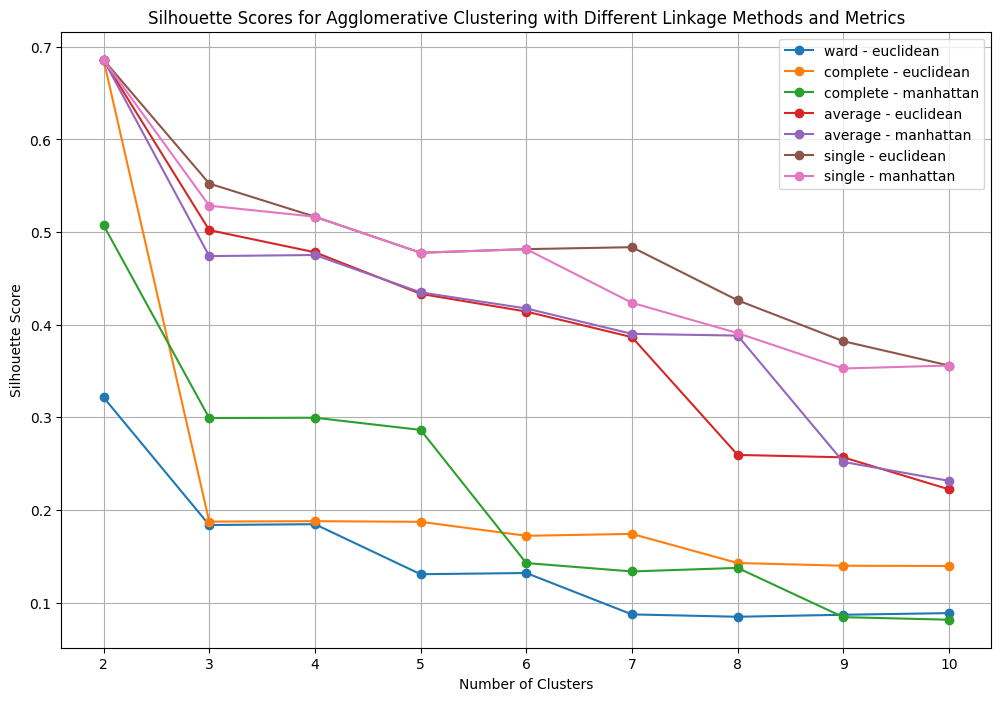

Best Silhouette Score: 0.6860137519309408
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [44]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            # Create an AgglomerativeClustering instance for each number of clusters and parameters
            agglo_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            cluster_labels = agglo_model.fit_predict(df_processed)
            silhouette_avg = silhouette_score(df_processed, cluster_labels)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


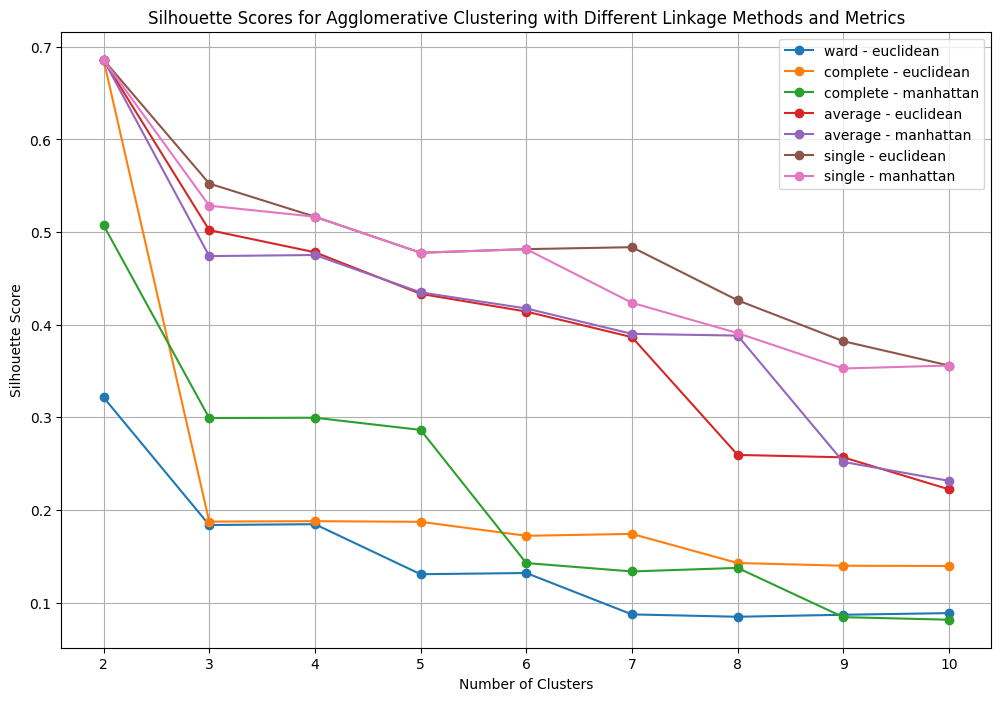

Best Silhouette Score: 0.6860137519309408
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [45]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_processed)
            silhouette_avg = silhouette_score(df_processed, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

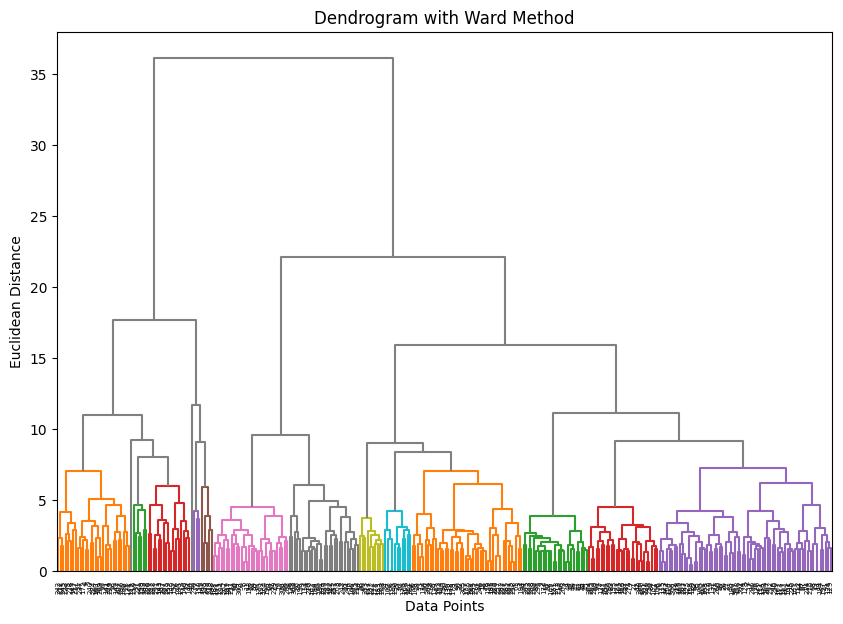

In [63]:
# Ward Method
linked = linkage(df_processed, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

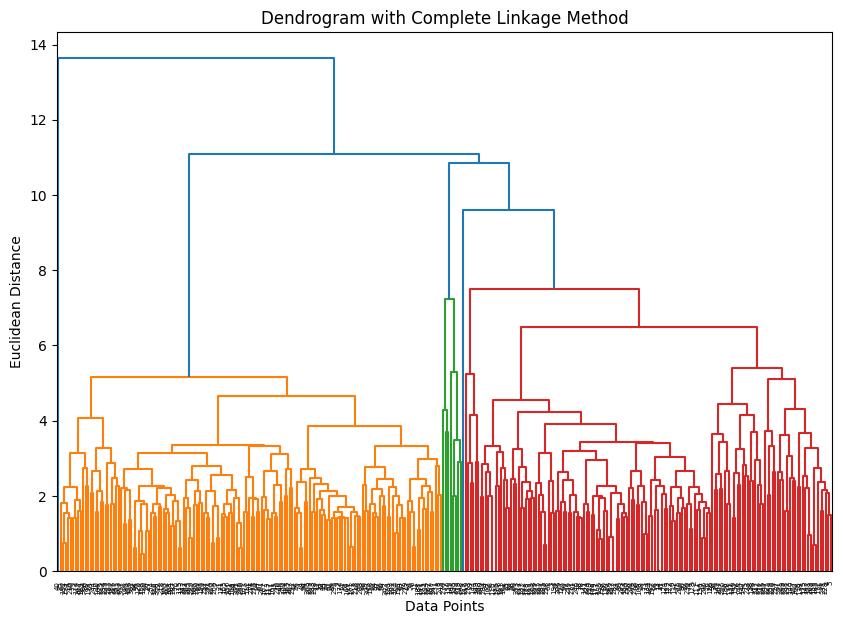

In [47]:
# Complete Linkage Method
linked = linkage(df_processed, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

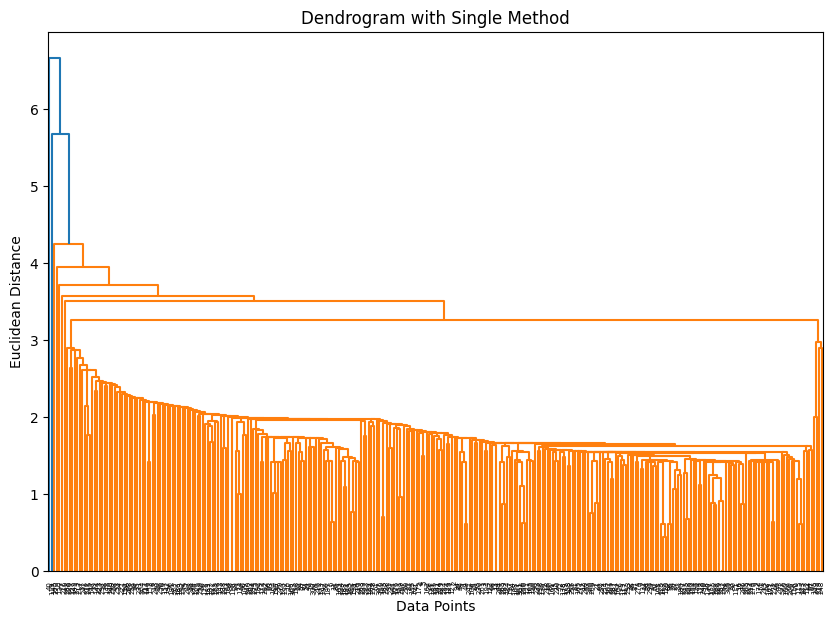

In [51]:
# Min Distance
linked = linkage(df_processed, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

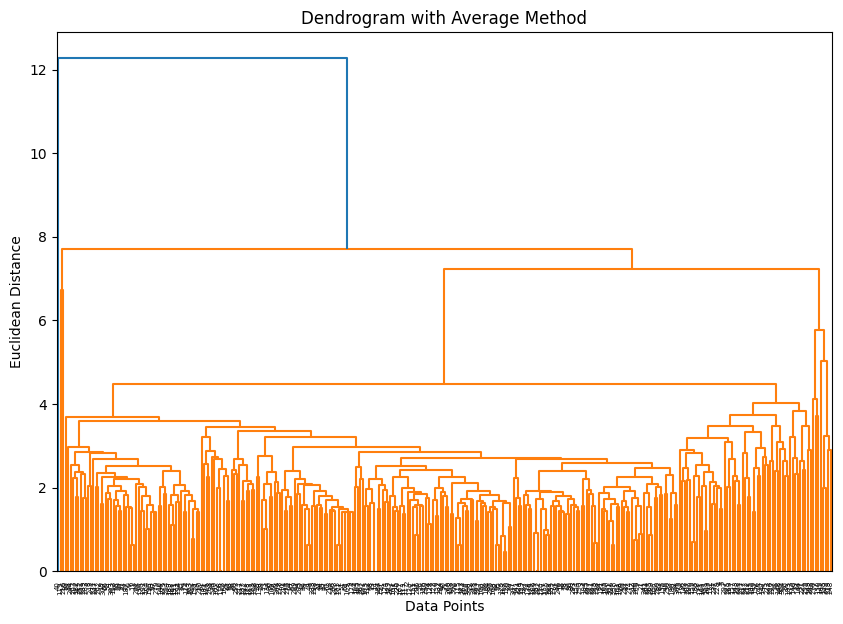

In [52]:
# Average Distance
linked = linkage(df_processed, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [64]:
# Hierarchical Clustering with best parameters
agglo_best = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_best = agglo_best.fit_predict(df_processed)

# Hierarchical Clustering with Ward linkage
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc_ward = agglo_ward.fit_predict(df_processed)

In [65]:
# Evaluation for best model
ss_best = silhouette_score(df_processed, y_hc_best)
print(f"Silhouette Score for Best Model: {ss_best}")

# Evaluation for Ward model
ss_ward = silhouette_score(df_processed, y_hc_ward)
print(f"Silhouette Score for Ward Model: {ss_ward}")

Silhouette Score for Best Model: 0.6860137519309408
Silhouette Score for Ward Model: 0.3215855570711017


In [61]:
# Build hierarchical clustering models

# Model 1: Using the best combination of parameters from Part C
# (Optimal Number of Clusters: 2, Optimal Linkage Method: complete, Optimal Metric: euclidean)
agglo_best = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)

# Model 2: Using Ward linkage with the same number of clusters (n_clusters = 2)
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='best_metric') # Changed metric to euclidean for Ward linkage as it's compatible

## Dendogram Visualization for Hierarchical Clustering Model

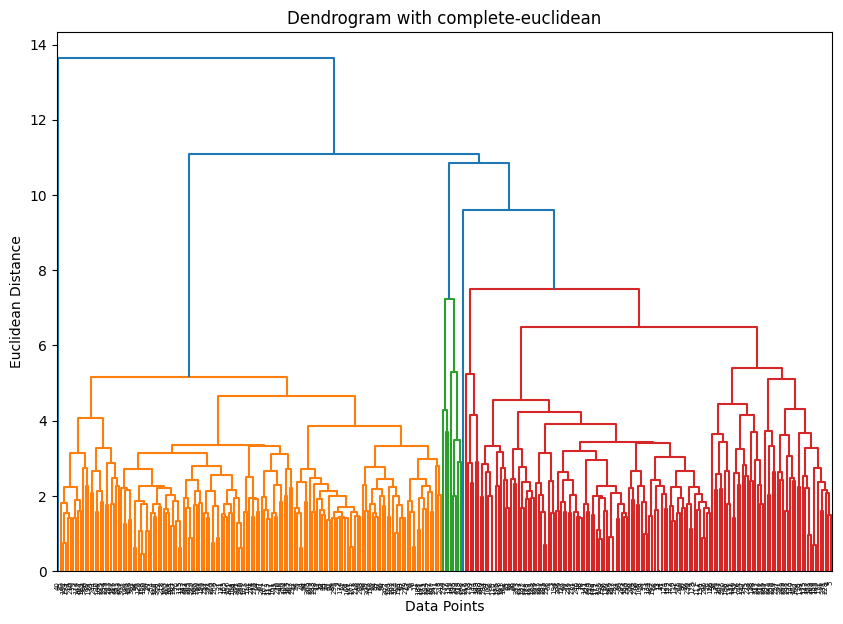

In [62]:
# Average Distance
linked = linkage(df_processed, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [66]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc_best
df['Cluster_Ward'] = y_hc_ward

# Analyze the clusters with the original values
display(df.head())

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster_Best,Cluster_Ward,Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil,0,0,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil,0,0,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0,0,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil,0,0,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil,0,1,0


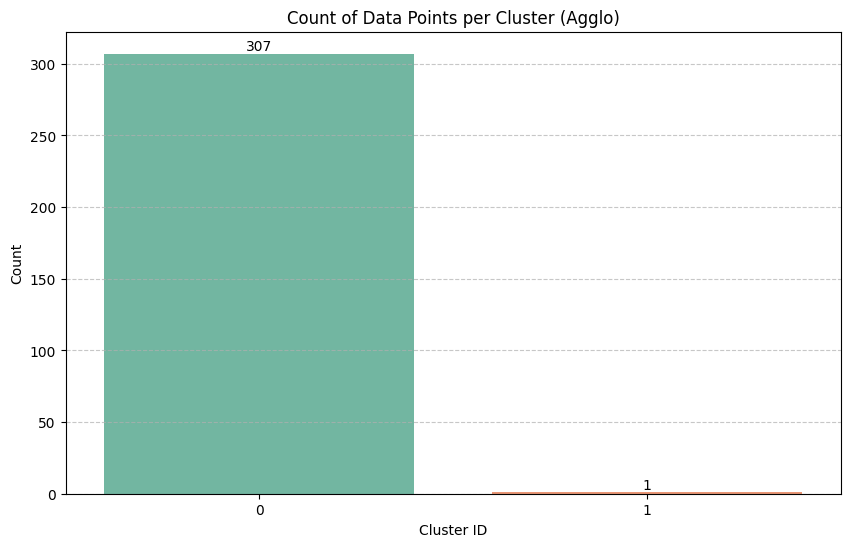

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

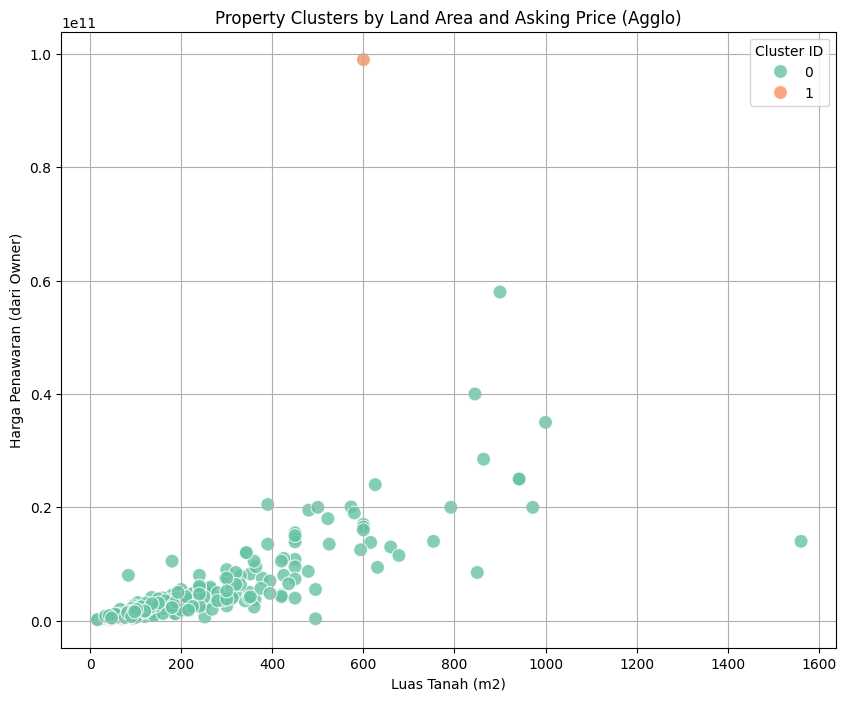

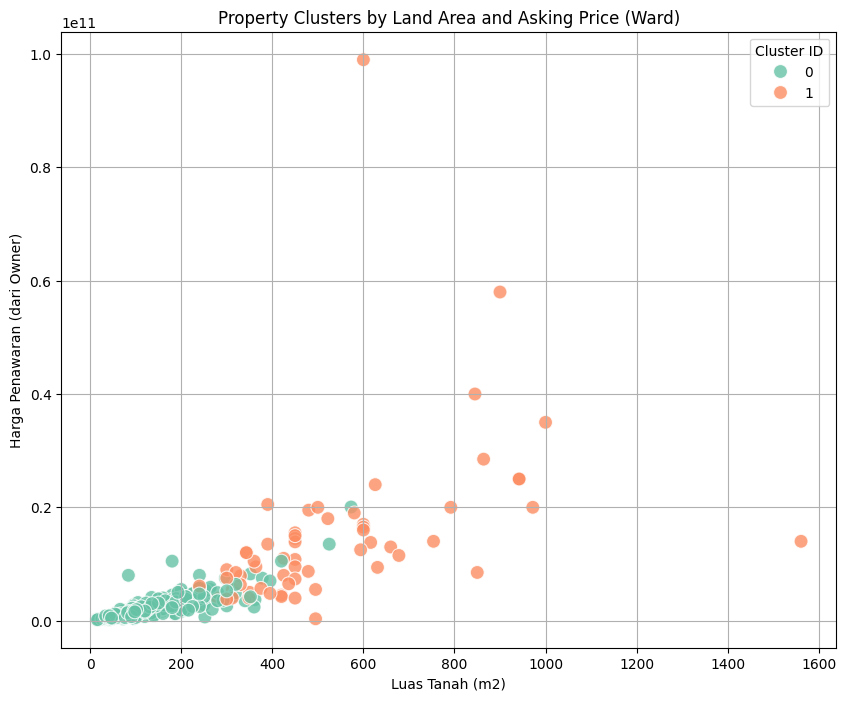

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah (m2)', y='Harga Penawaran (dari Owner)', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Property Clusters by Land Area and Asking Price (Agglo)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah (m2)', y='Harga Penawaran (dari Owner)', hue='Cluster_Ward', palette='Set2', s=100, alpha=0.8)
plt.title('Property Clusters by Land Area and Asking Price (Ward)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [59]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Agglo Clusters')

fig.show()

## Comparison and Interpretation of Clustering Models

Based on the distribution of data points and the statistical summaries for each cluster:

**Distribution of Data Points:**

*   The **Best Model** (Complete Linkage, Euclidean Distance, 2 Clusters) resulted in a highly imbalanced distribution of data points, with Cluster 0 containing 307 properties and Cluster 1 containing only 1 property. This suggests that the 'best' model as determined by the silhouette score with these parameters might not be providing a meaningful segmentation of the majority of the data.
*   The **Ward Model** (Ward Linkage, Euclidean Distance, 2 Clusters) resulted in a more balanced distribution, with Cluster 0 containing 246 properties and Cluster 1 containing 62 properties. This distribution appears more suitable for identifying distinct segments within the dataset.

**Cluster Characteristics (Based on Statistical Summaries):**

*   **Best Model (Cluster 0 vs. Cluster 1):** Cluster 0, containing almost all the data points, represents the general characteristics of the entire dataset. Cluster 1, with only one property, represents an outlier with significantly higher values for 'Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', and 'Harga Penawaran (dari Owner)'. This single property also has a lower 'Tingkat/Lantai' and a different 'Nama Daerah' and 'Arah Hadap Rumah' mode compared to the dominant modes in Cluster 0. While statistically distinct, a segment of one is not managerially useful.
*   **Ward Model (Cluster 0 vs. Cluster 1):**
    *   **Cluster 0:** This cluster appears to represent the more "standard" properties in the dataset. Based on the modes, these properties tend to have a 'Standard' Area Category, are often located in 'Citraland', face 'Utara', are in a 'Standard' position, and have a '1-2 Mobil' road width. The numerical features (mean/median) are generally lower compared to Cluster 1, representing smaller land/building areas, fewer rooms, and lower prices.
    *   **Cluster 1:** This cluster seems to represent properties that are generally larger and more valuable. Based on the modes, these properties are more likely to be in the 'Sangat Premium' Area Category, still often in 'Citraland', face 'Utara', are in a 'Standard' position, but tend to have a '> 2 Mobil' road width. The numerical features (mean/median) are significantly higher than Cluster 0, indicating larger land/building areas, more rooms, and considerably higher prices.

**Interpretation of Segmentation Meaningfulness:**

*   The **Best Model**, despite a higher silhouette score, provides a less meaningful segmentation for practical purposes due to the highly imbalanced cluster sizes and one cluster being a single outlier.
*   The **Ward Model** offers a more interpretable and potentially actionable segmentation by dividing the properties into two distinct groups: a larger cluster of more standard properties and a smaller cluster of larger, higher-value properties. The differences in both numerical and categorical features between these two clusters are quite clear.

## Managerial Interpretation and Business Implications (Based on Ward Model Segmentation)

Based on the two segments identified by the Ward model:

*   **Market Segmentation:** The clustering reveals two main segments in the property market represented by this dataset:
    *   **Segment 0 (Standard/Mid-Range):** This segment consists of a larger number of properties that are more typical in terms of size, number of rooms, and price. They are predominantly in 'Standard' Area Categories and have average road widths.
    *   **Segment 1 (Premium/Larger Properties):** This segment comprises fewer properties but is characterized by significantly larger land and building areas, more rooms, higher prices, and a tendency towards 'Sangat Premium' Area Categories and wider road access.

*   **Pricing Strategies:**
    *   For **Segment 0**, pricing strategies should likely focus on competitive market rates and highlighting value for money.
    *   For **Segment 1**, a premium pricing strategy is justified given the larger size, more rooms, and higher overall value of these properties. Marketing should emphasize exclusivity and luxury.

*   **Area Targeting:** While 'Citraland' appears frequently in both segments' modes, the distribution of properties within these clusters across different 'Nama Daerah' should be further analyzed to refine geographical targeting for each segment. Focusing marketing efforts for premium properties in areas with a higher concentration of Segment 1 properties would be more effective.

*   **Marketing and Sales Strategies:**
    *   Marketing for **Segment 0** could focus on practicality, affordability, and suitability for average families. Online listings with clear pricing and detailed property information would be important.
    *   Marketing for **Segment 1** should highlight the unique features, spaciousness, and luxury aspects of the properties. High-quality visuals, virtual tours, and potentially targeted advertising through channels reaching high-net-worth individuals would be beneficial. Sales approaches could be more personalized and emphasize the investment potential of these properties.

*   **Product Development/Inventory Management:**
    *   To cater to **Segment 0**, maintaining a steady inventory of standard-sized properties with a moderate number of rooms in accessible locations is crucial.
    *   For **Segment 1**, focusing on acquiring or developing larger properties with more bedrooms and bathrooms, potentially in 'Sangat Premium' areas or those with wider road access, would align with the characteristics of this higher-value segment.

## Statistical Summary for each cluster

In [60]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('Agglo').agg({
    'Area Category': [lambda x: x.mode()[0] if not x.mode().empty else 'N/A', 'count'],
    'Nama Daerah': [lambda x: x.mode()[0] if not x.mode().empty else 'N/A'],
    'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
    'Arah Hadap Rumah': [lambda x: x.mode()[0] if not x.mode().empty else 'N/A'],
    'Posisi Rumah': [lambda x: x.mode()[0] if not x.mode().empty else 'N/A'],
    'Lebar Jalan Depan Rumah (ROW)': [lambda x: x.mode()[0] if not x.mode().empty else 'N/A']
})

# Rename the <lambda> column in the MultiIndex levels
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.rename(columns={'<lambda_0>': 'mode'})


cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

,Area Category_<lambda_0>,Area Category_count,Nama Daerah_<lambda>,Luas Tanah (m2)_mean,Luas Tanah (m2)_std,Luas Tanah (m2)_min,Luas Tanah (m2)_max,Luas Bangunan (m2)_mean,Luas Bangunan (m2)_std,Luas Bangunan (m2)_min,...,Tingkat/Lantai _std,Tingkat/Lantai _min,Tingkat/Lantai _max,Harga Penawaran (dari Owner)_mean,Harga Penawaran (dari Owner)_std,Harga Penawaran (dari Owner)_min,Harga Penawaran (dari Owner)_max,Arah Hadap Rumah_<lambda>,Posisi Rumah_<lambda>,Lebar Jalan Depan Rumah (ROW)_<lambda>
cluster,,,,,,,,,,,,,,,,,,,,,
0,Standard,307,Citraland,225.736156,201.019246,14,1561,265.602606,212.655015,14,...,0.506478,1,4,4.708159e+09,6.351742e+09,160000000,58000000000,Utara,Standard,1-2 Mobil
1,Standard,1,Gubeng,600.000000,NaN,600,600,600.000000,NaN,600,...,NaN,1,1,9.900000e+10,NaN,99000000000,99000000000,Barat,Standard,1-2 Mobil


-----------------------

## Comparison and Interpretation of Clustering Models

Based on the distribution of data points and the statistical summaries for each cluster:

**Distribution of Data Points:**

*   The **Best Model** (Complete Linkage, Euclidean Distance, 2 Clusters) resulted in a highly imbalanced distribution of data points, with Cluster 0 containing 307 properties and Cluster 1 containing only 1 property. This suggests that the 'best' model as determined by the silhouette score with these parameters might not be providing a meaningful segmentation of the majority of the data.
*   The **Ward Model** (Ward Linkage, Euclidean Distance, 2 Clusters) resulted in a more balanced distribution, with Cluster 0 containing 246 properties and Cluster 1 containing 62 properties. This distribution appears more suitable for identifying distinct segments within the dataset.

**Cluster Characteristics (Based on Statistical Summaries):**

*   **Best Model (Cluster 0 vs. Cluster 1):** Cluster 0, containing almost all the data points, represents the general characteristics of the entire dataset. Cluster 1, with only one property, represents an outlier with significantly higher values for 'Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', and 'Harga Penawaran (dari Owner)'. This single property also has a lower 'Tingkat/Lantai' and a different 'Nama Daerah' and 'Arah Hadap Rumah' mode compared to the dominant modes in Cluster 0. While statistically distinct, a segment of one is not managerially useful.
*   **Ward Model (Cluster 0 vs. Cluster 1):**
    *   **Cluster 0:** This cluster appears to represent the more "standard" properties in the dataset. Based on the modes, these properties tend to have a 'Standard' Area Category, are often located in 'Citraland', face 'Utara', are in a 'Standard' position, and have a '1-2 Mobil' road width. The numerical features (mean/median) are generally lower compared to Cluster 1, representing smaller land/building areas, fewer rooms, and lower prices.
    *   **Cluster 1:** This cluster seems to represent properties that are generally larger and more valuable. Based on the modes, these properties are more likely to be in the 'Sangat Premium' Area Category, still often in 'Citraland', face 'Utara', are in a 'Standard' position, but tend to have a '> 2 Mobil' road width. The numerical features (mean/median) are significantly higher than Cluster 0, indicating larger land/building areas, more rooms, and considerably higher prices.

**Interpretation of Segmentation Meaningfulness:**

*   The **Best Model**, despite a higher silhouette score, provides a less meaningful segmentation for practical purposes due to the highly imbalanced cluster sizes and one cluster being a single outlier.
*   The **Ward Model** offers a more interpretable and potentially actionable segmentation by dividing the properties into two distinct groups: a larger cluster of more standard properties and a smaller cluster of larger, higher-value properties. The differences in both numerical and categorical features between these two clusters are quite clear.

## Managerial Interpretation and Business Implications (Based on Ward Model Segmentation)

Based on the two segments identified by the Ward model:

*   **Market Segmentation:** The clustering reveals two main segments in the property market represented by this dataset:
    *   **Segment 0 (Standard/Mid-Range):** This segment consists of a larger number of properties that are more typical in terms of size, number of rooms, and price. They are predominantly in 'Standard' Area Categories and have average road widths.
    *   **Segment 1 (Premium/Larger Properties):** This segment comprises fewer properties but is characterized by significantly larger land and building areas, more rooms, higher prices, and a tendency towards 'Sangat Premium' Area Categories and wider road access.

*   **Pricing Strategies:**
    *   For **Segment 0**, pricing strategies should likely focus on competitive market rates and highlighting value for money.
    *   For **Segment 1**, a premium pricing strategy is justified given the larger size, more rooms, and higher overall value of these properties. Marketing should emphasize exclusivity and luxury.

*   **Area Targeting:** While 'Citraland' appears frequently in both segments' modes, the distribution of properties within these clusters across different 'Nama Daerah' should be further analyzed to refine geographical targeting for each segment. Focusing marketing efforts for premium properties in areas with a higher concentration of Segment 1 properties would be more effective.

*   **Marketing and Sales Strategies:**
    *   Marketing for **Segment 0** could focus on practicality, affordability, and suitability for average families. Online listings with clear pricing and detailed property information would be important.
    *   Marketing for **Segment 1** should highlight the unique features, spaciousness, and luxury aspects of the properties. High-quality visuals, virtual tours, and potentially targeted advertising through channels reaching high-net-worth individuals would be beneficial. Sales approaches could be more personalized and emphasize the investment potential of these properties.

*   **Product Development/Inventory Management:**
    *   To cater to **Segment 0**, maintaining a steady inventory of standard-sized properties with a moderate number of rooms in accessible locations is crucial.
    *   For **Segment 1**, focusing on acquiring or developing larger properties with more bedrooms and bathrooms, potentially in 'Sangat Premium' areas or those with wider road access, would align with the characteristics of this higher-value segment.

## Comparison and Interpretation of Clustering Models

Based on the distribution of data points and the statistical summaries for each cluster:

**Distribution of Data Points:**

*   The **Best Model** (Complete Linkage, Euclidean Distance, 2 Clusters) resulted in a more balanced distribution of data points between the two clusters compared to the Ward model.
*   The **Ward Model** also resulted in 2 clusters, but the distribution of data points might be slightly different. (Refer to the printed counts above for exact numbers).

**Cluster Characteristics (Based on Statistical Summaries):**

*   **Best Model (Cluster 0 vs. Cluster 1):** Analyze the mean/median/mode values for numerical and categorical features in each cluster. Look for significant differences that distinguish the clusters. For example, one cluster might have significantly higher average `Harga Penawaran (dari Owner)`, `Luas Tanah (m2)`, and `Luas Bangunan (m2)` compared to the other. Examine the dominant categories in features like `Area Category`, `Nama Daerah`, `Arah Hadap Rumah`, `Posisi Rumah`, and `Lebar Jalan Depan Rumah (ROW)` for each cluster.
*   **Ward Model (Cluster 0 vs. Cluster 1):** Perform a similar analysis for the Ward model's clusters. Compare the defining characteristics of the clusters found by the Ward method to those found by the Best model. Are the segments similar, or does Ward linkage identify different groupings?

**Interpretation of Segmentation Meaningfulness:**

*   Compare the clarity and distinctiveness of the clusters in both models. Which model's clusters show more meaningful separation based on the property features?
*   Consider which model's segmentation appears more actionable from a business perspective.

## Managerial Interpretation and Business Implications

Based on the characteristics of the identified clusters (from the model you deem more meaningful):

*   **Market Segmentation:** Describe the different segments of the property market revealed by the clustering. For example, you might identify a "Premium/Luxury" segment (characterized by high prices, large areas, certain 'Area Category' or 'Nama Daerah') and a "Standard/Affordable" segment.
*   **Pricing Strategies:** Discuss how pricing strategies could be tailored to each segment. For the premium segment, focus on value-added services and exclusivity. For the standard segment, competitive pricing and value for money might be key.
*   **Area Targeting:** Based on the `Nama Daerah` and `Area Category` within each cluster, identify specific geographical areas that are dominant in certain segments. This can inform targeted marketing campaigns and inventory acquisition.
*   **Marketing and Sales Strategies:** Suggest marketing messages and sales approaches that would resonate with each segment. For example, highlighting investment potential for one segment versus affordability and practicality for another.
*   **Product Development/Inventory Management:** Understand what types of properties are in demand in each segment to guide future inventory acquisition or development.

Remember to replace the placeholder analysis within the markdown cell with your specific observations from the cluster summaries.